## Extraction frames from video

In [1]:
import os
import shutil
# pip3 install opencv-python
import cv2
%matplotlib notebook
from matplotlib import pyplot as plt

In [3]:
def get_subdirs(parent_dir):
    return [name for name in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, name))]

def print_info(vcap):
    fps = vcap.get(cv2.CAP_PROP_FPS)
    width = vcap.get(cv2.CAP_PROP_FRAME_WIDTH )
    height = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT )
    print(f"\tfps={fps}, width={width}, height={height}")

def extract_frames(path_to_video, path_to_frames):
    vcap = cv2.VideoCapture(path_to_video)
    print_info(vcap)
    count = 0
    success, image = vcap.read()
    print("\t", end='')
    while success:  
        cv2.imwrite(os.path.join(path_to_frames, f"frame{count}.jpg"), image) 
        count += 1
        if count % 30 == 0:
            print(".", end='')
        success, image = vcap.read()
    print("")

def extract_all_frames(data_dir, update=False):
    for sub_dir in get_subdirs(data_dir):
        print(f"Record ID: {sub_dir}")
        record_dir = os.path.join(data_dir, sub_dir)
        path_to_video = os.path.join(record_dir, "video.mp4")
        path_to_frames = os.path.join(record_dir, "frames")
        if update and os.path.exists(path_to_frames):
            shutil.rmtree(path_to_frames)
        if not os.path.exists(path_to_frames):
            os.mkdir(path_to_frames)
        if os.path.exists(path_to_video) and len(os.listdir(path_to_frames)) == 0:
            extract_frames(path_to_video, path_to_frames)
        print(f"\tcount of frames: {len(os.listdir(path_to_frames))}")

In [5]:
data_dir = "../../mydata/chess_board"
extract_all_frames(data_dir, False)

Record ID: 5de94dd1-963e-934c-5be5-551938968072
	count of frames: 1245


In [4]:
def display_frames(data_dir, record_id, count=4, from_frame=0):
    path_to_frames = os.path.join(data_dir, record_id, "frames")
    print(f"\tcount of frames: {len(os.listdir(path_to_frames))}")
    if count > 1:
        fig, ax = plt.subplots(1, count)
        for i in range(count):
            title = f"frame{from_frame + i}.jpg"
            img = cv2.imread(os.path.join(path_to_frames, title))
            ax[i].imshow(img)
            ax[i].set_title(title)
    else:
        title = f"frame{from_frame}.jpg"
        img = cv2.imread(os.path.join(path_to_frames, title))
        plt.imshow(img)
        plt.title(title)
    plt.show()

	count of frames: 930


<IPython.core.display.Javascript object>


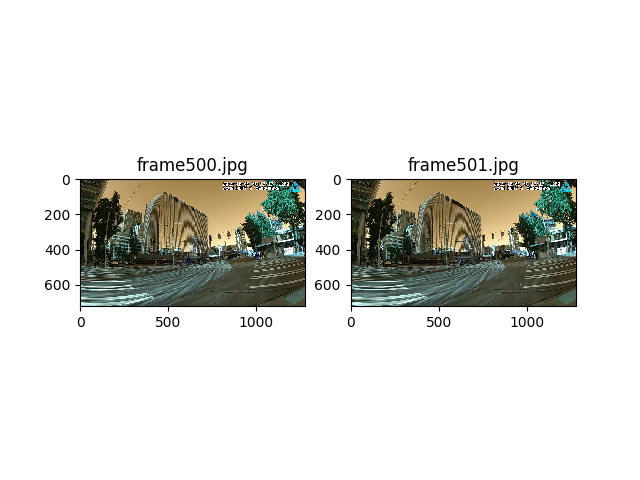

In [10]:
display_frames(data_dir, "5d9e241d-9911-ec37-d890-551938968072", 2, 500)

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(flags))

In [ ]:
vcap = cv2.VideoCapture("../../mydata/evidences_1/5d9e3a6b-c07a-7aca-44be-551938968072/video.mp4")
for i in range(22):
    print(vcap.get(i))